In [1]:
#!pip install pythae

In [2]:
import torch
import torchvision.datasets as datasets

%load_ext autoreload
%autoreload 2

In [3]:
mnist_trainset = datasets.MNIST(root='../../data', train=True, download=True, transform=None)

n_samples = 200
train_dataset = mnist_trainset.data[:n_samples].reshape(-1, 1, 28, 28)
eval_dataset = mnist_trainset.data[-50:].reshape(-1, 1, 28, 28)

In [13]:
from pythae.models import VAE, VAEConfig
from pythae.trainers.training_config import TrainingConfig
from pythae.pipelines.training import TrainingPipeline

In [14]:
config = TrainingConfig(
    output_dir='my_model',
    train_early_stopping=50,
    learning_rate=1e-3,
    batch_size=200, # Set to 200 for demo purposes to speed up (default: 50)
    max_epochs=500 # Set to 500 for demo purposes. Augment this in your case to access to better generative model (default: 20000)
)


model_config = VAEConfig(
    input_dim=(1, 28, 28),
    latent_dim=10
)

model = VAE(
    model_config=model_config
)

In [15]:
pipeline = TrainingPipeline(
    training_config=config,
    model=model
)

In [16]:
pipeline(
    train_data=train_dataset,
    eval_data=eval_dataset
)

Data normalized using individual_min_max_scaling.
 -> If this is not the desired behavior pass an instance of DataProcess with 'data_normalization_type' attribute set to desired normalization or None

Data normalized using individual_min_max_scaling.
 -> If this is not the desired behavior pass an instance of DataProcess with 'data_normalization_type' attribute set to desired normalization or None

Model passed sanity check !

Model passed sanity check !

Created my_model/VAE_training_2021-10-05_16-02-02. 
Training config, checkpoints and final model will be saved here.

Created my_model/VAE_training_2021-10-05_16-02-02. 
Training config, checkpoints and final model will be saved here.

Successfully launched training !
Successfully launched training !
----------------------------------
----------------------------------
Training ended!
Training ended!
Saved final model in my_model/VAE_training_2021-10-05_16-02-02/final_model
Saved final model in my_model/VAE_training_2021-10-05_16-02-0

In [17]:
from pythae.pipelines.generation import GenerationPipeline

In [19]:
last_training = sorted(os.listdir('my_model'))[-1]
trained_model = VAE.load_from_folder(os.path.join('my_model', last_training, 'final_model'))

In [20]:
from pythae.samplers import NormalSampler

In [21]:
normal_samper = NormalSampler(
    model=trained_model
)

In [23]:
gen_data = normal_samper.sample(
    num_samples=10
)

In [26]:
import matplotlib.pyplot as plt

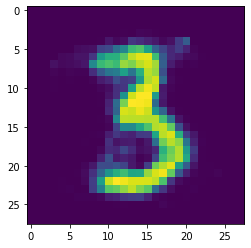

In [30]:
plt.imshow(gen_data[4, 0].detach().numpy())